**Objectives**

Perform more exploratory analysis on the input data for the logistic regression model. The goal is to come up with data filters and transformations that can be used to address assumptions about the research question. The model can then be re-evaulated and compared to the intial prediction rate results. 

Re-evaluate model with different techniques for constraining the observation
space:

○ Use subsets of meals within calorie distribution categories. For example: is there any
difference between low calories and high calorie meals?

○ Explore the possibility of transforming the input data from continuous to categorical.The
component variables contain a high amount of 0’s with a right tail heavy distribution.

○ Use only meals that are consumed at home, since eating out is generally more unhealthy

○ Constrain the non-seafood class to meals containing meat only. This will exclude vegetarian meals and compare seafood consumers to meat consumers.

○ Use a participant age filter, to look for adult participants only.

○ Attempt a classification of meals that contain both meat and seafood.

○ Convert input variables to standard units (some are in grams, some are in cups, etc.)

○ Input from research collaborators:

    ■ Obtain a more educated selection of input variables.

    ■ Attempt to weight the observations, to adjust for the survey design methods.

**Section 1: Meal Energy Statistics**

981

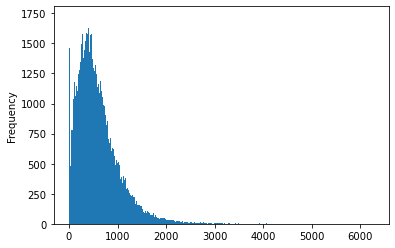

In [19]:
import pandas as pd

#Read data frame and add plant pf total variable
df = pd.read_csv('../../Data/nhanes_full_pre_proc.csv')
df['PF_PLANT_D_TOTAL'] = df['PF_EGGS']+df['PF_SOY']+df['PF_NUTSDS']+df['PF_LEGUMES']

df['DR1IKCAL'].plot.hist(bins=500)

The plot above is displaying the distribution of the KCAL variable. One apparent potential issue is the left most bar, indicating meals where this variable is equal to 0.

In [24]:
zero_kcal_meals = df[df['DR1IKCAL']==0]
len(zero_kcal_meals)

981

Indeed, there are 981 meals where KCAL = 0. 

In [96]:
zero_kcal_meals[['SEQN', 'DR1.030Z', 'DR1.020', 'DR1IKCAL']].head(5)

,SEQN,DR1.030Z,DR1.020,DR1IKCAL
361,31330,3,90000,0.0
413,31364,14,86400,0.0
489,31411,15,54000,0.0
490,31411,15,70200,0.0
491,31411,15,75600,0.0


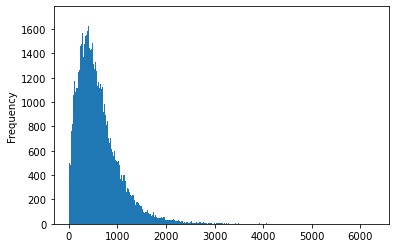

In [72]:
#Filter out 0 KCAL meals
df = df[df['DR1IKCAL'] > 0]
df['DR1IKCAL'].plot.hist(bins=500)

In [58]:
#Obtain statistics for KCAL 
df['DR1IKCAL'].describe()

count    101731.000000
mean        605.018942
std         445.749113
min           1.000000
25%         297.000000
50%         508.000000
75%         798.000000
max        6264.000000
Name: DR1IKCAL, dtype: float64

In [69]:
#Home vs Out Meals
df.groupby('eathome')['DR1IKCAL'].describe()

,count,mean,std,min,25%,50%,75%,max
eathome,,,,,,,,
0,32830.0,687.545111,476.684325,1.0,360.0,587.0,899.0,5957.0
1,68901.0,565.696811,424.626035,1.0,271.0,471.0,751.0,6264.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feacb564ee0>,
      dtype=object)

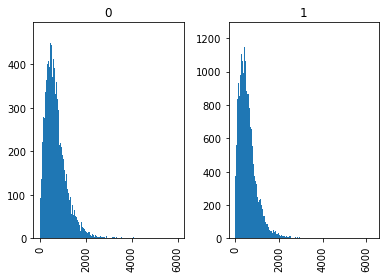

In [77]:
#Home vs Out Meals
df['DR1IKCAL'].hist(bins=500, by=df['eathome'])

In [78]:
#Seafood vs non seafood meals
df.groupby('seafood_meal')['DR1IKCAL'].describe()

,count,mean,std,min,25%,50%,75%,max
seafood_meal,,,,,,,,
0,95782.0,595.879560,442.124805,1.0,289.0,499.0,789.0,6264.0
1,5949.0,752.167759,477.014340,40.0,431.0,643.0,943.0,4451.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feacebd8eb0>,
      dtype=object)

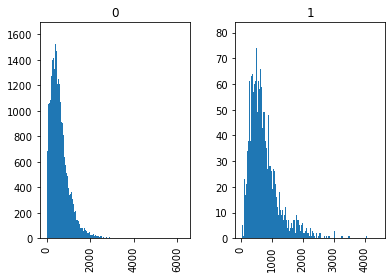

In [79]:
#Seafood vs non seafood meals
df['DR1IKCAL'].hist(bins=500, by=df['seafood_meal'])

In [81]:
#Seafood vs non seafood home and out
df.groupby(['seafood_meal','eathome'])['DR1IKCAL'].describe()

count        mean         std   min     25%    50%  \
seafood_meal eathome                                                         
0            0        30638.0  675.534695  470.570282   1.0  352.00  576.0   
             1        65144.0  558.416800  422.941684   1.0  265.00  463.5   
1            0         2192.0  855.416971  527.356298  50.0  495.75  736.0   
             1         3757.0  691.927602  433.886534  40.0  403.00  599.0   

                          75%     max  
seafood_meal eathome                   
0            0         885.00  5957.0  
             1         743.00  6264.0  
1            0        1073.25  4451.0  
             1         860.00  3509.0

**Section 1: Meal Energy Grouping**

Create meal energy grouping based on quantiles from the 'KCAL' variable.

In [99]:
#Create meal energy category based on quantiles from KCAL
df.loc[df['DR1IKCAL'] < df['DR1IKCAL'].describe()['25%'], 'meal_energy'] = "Low"
df.loc[(df['DR1IKCAL'] > df['DR1IKCAL'].describe()['25%']) 
       & (df['DR1IKCAL'] < df['DR1IKCAL'].describe()['50%']), 'meal_energy'] = "Medium-Low"
df.loc[(df['DR1IKCAL'] > df['DR1IKCAL'].describe()['50%']) 
       & (df['DR1IKCAL'] < df['DR1IKCAL'].describe()['75%']), 'meal_energy'] = "Medium-High"
df.loc[df['DR1IKCAL'] > df['DR1IKCAL'].describe()['75%'], 'meal_energy'] = "High"

#Display top of new meal energy category
df[['SEQN', 'DR1IKCAL','meal_energy']].head(20)

,SEQN,DR1IKCAL,meal_energy
0,31127,447.0,Medium-Low
1,31127,264.0,Low
2,31128,861.0,High
3,31129,867.0,High
4,31129,1150.0,High
5,31131,253.0,Low
6,31131,88.0,Low
7,31132,130.0,Low
8,31132,836.0,High
9,31132,491.0,Medium-Low


**Section 1: Questions**

1. Why are there so many meals with 0 KCAL?
2. Why are the KCAL values so large? Looking at the statistics, these seem more like calories instead of kilo-calories.
3. Is the grouping method for this variable adequate?

**Section 2: FPED Component Statstics**